In [ ]:
!pip install scipy

In [2]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

**Домашнее задание «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок»**


In [3]:
#Вспомогательная функция для подсчета доверительного интервала
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [4]:
sigma = np.sqrt(225)  # Стандартное отклонение
Z = 1.96 # Квантиль нормального распределения при уровне доверия 0.95
Delta = 3 # Погрешность

In [5]:
n = int(((Z * sigma)/Delta)**2)
n

96

In [6]:
n = 96  #Запишите в эту переменную ваш высчитанный ответ!

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [7]:
n = 25 # Размер выборки
dof = n - 1 # Число степеней свободы 
mn = 130 # Среднее значение
sigma = 15 # Стандартное отклонение
T = 2.48 # Параметр t распределения

In [8]:
(mn - T*sigma/np.sqrt(n), mn + T*sigma/np.sqrt(n))

(122.56, 137.44)

In [9]:
L = int((mn + T*sigma/np.sqrt(n)) - (mn - T*sigma/np.sqrt(n)))
L

14

In [10]:
L = 14  #Запишите в эту переменную ваш высчитанный ответ!


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [11]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия


In [12]:
stat, p = stats.ttest_ind(mens, womens)

print(f'Статистика = {stat:.5f}, p = {p:.5f}')

if p > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 3.66358, p = 0.00025
Отклоняем нулевую гипотезу, средние, вероятно, различаются


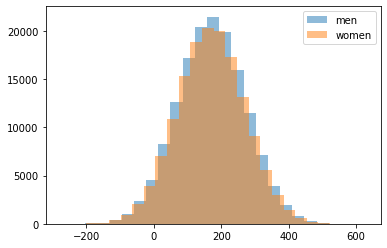

In [13]:
plt.hist(mens, bins=25, alpha = 0.5); # мужчины
plt.hist(womens, bins=25, alpha = 0.5);  # женщины
plt.legend(['men', 'women'])

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [14]:
sigma = 150  # Стандартное отклонение
Z = 1.96 # Квантиль нормального распределения при уровне доверия 0.95 для двусторонней альтернативы
Delta = 50 # Погрешность

In [15]:
n = int(((Z * sigma)/Delta)**2)
n

34

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [16]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [17]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations) # Возможно пригодится эта функция.

oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

Поскольку p-value > 0.05, мы не отвергаем Н0, поэтому не понятно ничего с этим "волшебником".

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [18]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

mean_confidence_interval(data, 0.9)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [19]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 


n_A = len(A)
n_B = len(B)

print(n_A,n_B)

112 95


Выборки разной размерности и > 30. 

In [20]:
stats.ttest_ind(A, B, equal_var = False)

Ttest_indResult(statistic=11.803253652222743, pvalue=1.3216865332483862e-24)

При уровне значимости 0,5 мы отвергаем H0 (что выборки принадлежат одному множеству), поскольку pvalue сильно меньше 0,5

(array([10., 22., 48.,  9.,  6.]),
 array([1. , 2.4, 3.8, 5.2, 6.6, 8. ]),
 <a list of 5 Patch objects>)

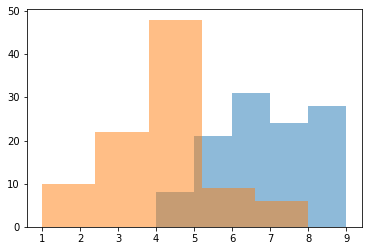

In [ ]:
plt.hist(A, bins=5, alpha = 0.5);
plt.hist(B, bins=5, alpha = 0.5)

Визуально выборки не принадлежат одному множеству.

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
# во-первых, надо исходить из уровня значимости, который мы выбрали.
# Еcли это 0,01, то мы не отвергаем H0 (что распределение нормальное), если 0,5 то отвергаем
# Поскольку альфа - это вероятноть ошибки первого рода, то есть вероятность принять Н0, если она неверна, то будем считать наше распределение нормальным.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

(array([ 1.,  0.,  3.,  7., 10., 23., 25., 39., 52., 41., 41., 25., 19.,
         7.,  7.]),
 array([122.95604119, 128.44510897, 133.93417676, 139.42324455,
        144.91231234, 150.40138013, 155.89044792, 161.3795157 ,
        166.86858349, 172.35765128, 177.84671907, 183.33578686,
        188.82485464, 194.31392243, 199.80299022, 205.29205801]),
 <a list of 15 Patch objects>)

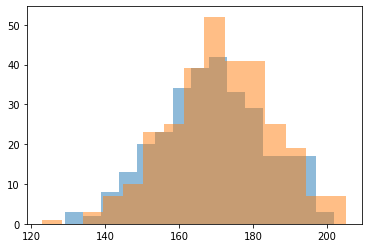

In [ ]:
plt.hist(A, bins=15, alpha = 0.5);
plt.hist(B, bins=15, alpha = 0.5)

На графике видно, что выборки незначительно отличаются.

In [ ]:
stats.ttest_ind(A, B, equal_var=True)

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284593140469285)

p-value > уровня значимости 0,5, поэтому мы не отвергаем H0 (различия не значимы). Различия были бы значимы, если p-value < 0,5.